<a href="https://colab.research.google.com/github/CristianMts/Escola-DNC/blob/main/RID146016_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [323]:
!pip install yellowbrick

In [324]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

## Etapa 01 - Análise exploratória dos dados


1. Carregue a base de dados;
2. Realize uma descrição estatística dos dados;
3. Visualize as distribuições e identifique a relevância das colunas para a análise;
4. Verifique a presença de dados nulos, duplicados, outliers e demais inconsistências nos dados.



In [325]:
# Lendo o dataset
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [326]:
#Resumo estatístico para verificar dados numéricos
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

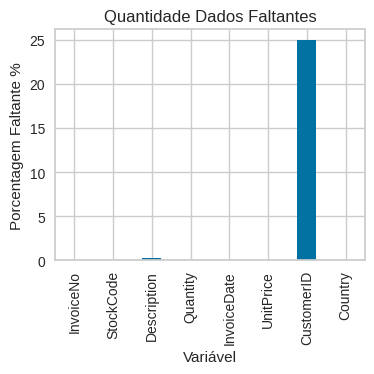

In [328]:
# Verificar valores nulos
(df.isnull().mean()*100).plot.bar(figsize=(4,3))
plt.ylabel('Porcentagem Faltante %')
plt.xlabel('Variável')
plt.title('Quantidade Dados Faltantes')
df.isnull().sum()

In [329]:
df[df.duplicated(keep=False)].sort_values('Description')

InvoiceNo StockCode                       Description  Quantity  \
483390    577503    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
483414    577503    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
160498    550459    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
160509    550459    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
460074    575895     23345                 DOLLY GIRL BEAKER         1   
...          ...       ...                               ...       ...   
113550    545980     84836       ZINC METAL HEART DECORATION         2   
468873    576559     23151         ZINC SWEETHEART SOAP DISH         1   
468850    576559     23151         ZINC SWEETHEART SOAP DISH         1   
104362    545166     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   
104355    545166     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
483390  11/20/2011 12:34       2.55     18110.0  United Kingdom  
483414  11/20/2011 12:34       2.55     18110.0  United Kingdom  
160498   4/18/2011 13:17       2.55     18116.0  United Kingdom  
160509   4/18/2011 13:17       2.55     18116.0  United Kingdom  
460074  11/11/2011 14:50       1.25     17052.0  United Kingdom  
...                  ...        ...         ...             ...  
113550    3/8/2011 12:49       1.25     14730.0  United Kingdom  
468873  11/15/2011 13:19       2.49     14711.0  United Kingdom  
468850  11/15/2011 13:19       2.49     14711.0  United Kingdom  
104362   2/28/2011 14:03       0.85     17027.0  United Kingdom  
104355   2/28/2011 14:03       0.85     17027.0  United Kingdom  

[10147 rows x 8 columns]

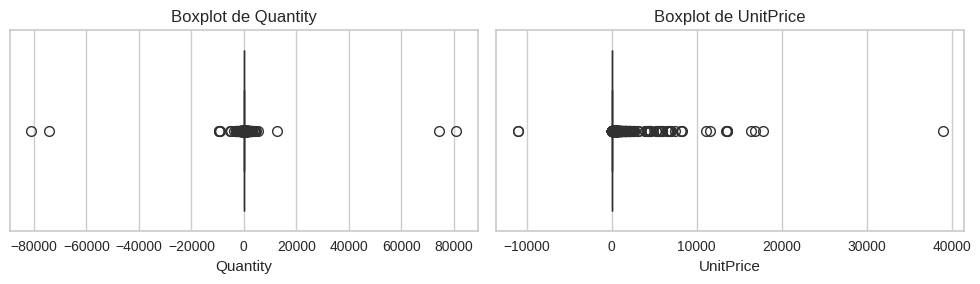

In [330]:
# Boxplot para detectar outliers
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')

plt.tight_layout()
plt.show()

## Etapa 02 - Pré-processamento dos dados

1. Realize a normalização dos dados
2. Faça uma seleção das variáveis mais relevantes para o modelo;
3. Remova os dados nulos, duplicados, outliers e inconsistentes



In [331]:
#Drop linhas Nulas da Coluna 'CustomerID'
df.dropna(axis=0, subset='CustomerID', inplace=True)

In [332]:
df.drop(df.query('UnitPrice <= 0').index, axis=0, inplace=True)
df.drop(df.query('Quantity <= 0').index, axis=0, inplace=True)

In [333]:
# Removendo registros duplicados
df.drop_duplicates(inplace=True)
df.describe()

Quantity      UnitPrice     CustomerID
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914   15287.843865
std       180.492832      22.241836    1713.539549
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000

In [334]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [335]:
# Alterando o tipo de dados
df = df.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


In [336]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
392687    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
392688    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
392689    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
392690    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
392691    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                    ...        ...         ...             ...  
392687 2011-12-09 12:50:00       0.85       12680          France  
392688 2011-12-09 12:50:00       2.10       12680          France  
392689 2011-12-09 12:50:00       4.15       12680          France  
392690 2011-12-09 12:50:00       4.15       12680          France  
392691 2011-12-09 12:50:00       4.95       12680          France  

[392692 rows x 8 columns]

In [337]:
# Eliminando outliers
df.drop(df.query('Quantity > 10000').index, axis=0, inplace=True)
df.drop(df.query('UnitPrice > 5000').index, axis=0, inplace=True)

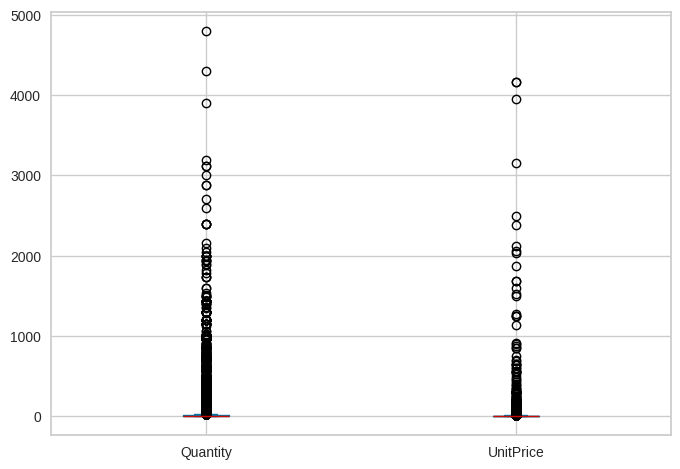

In [338]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df[['Quantity', 'UnitPrice']].plot.box();

In [339]:
# Criando Feature (Coluna Adicional)
df['Total'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'Total']].describe().style.format('{:.2f}')

In [340]:
#Recência, Frequência e Valor Monetário (RFM)
lastdate = df['InvoiceDate'].max()
lastdate
rfm = df.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (lastdate - x.max()).days),  # Recência: dias desde a última compra
    frequency=('InvoiceDate', 'count'),  # Frequência: número de compras
    monetary_value=('Total', 'sum')  # Valor monetário: soma dos valores das compras
)
print(rfm.head())

            recency  frequency  monetary_value
CustomerID                                    
12347             1        182         4310.00
12348            74         31         1797.24
12349            18         73         1757.55
12350           309         17          334.40
12352            35         85         2506.04


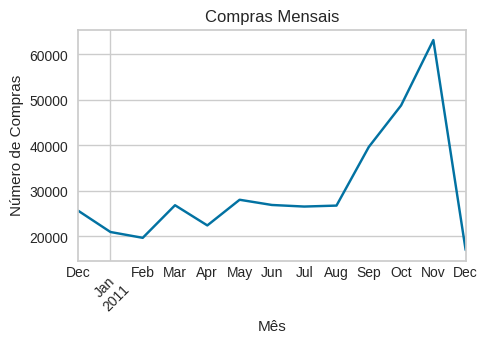

year_month
2010-12    25670
2011-01    20987
2011-02    19706
2011-03    26870
2011-04    22433
2011-05    28072
2011-06    26926
2011-07    26580
2011-08    26790
2011-09    39669
2011-10    48793
2011-11    63168
2011-12    17025
Freq: M, dtype: int64

In [341]:
# Análise Temporal: Comportamento de compras ao longo do tempo
df['year_month'] = df['InvoiceDate'].dt.to_period('M')
compras_por_mes = df.groupby('year_month').size()

plt.figure(figsize=(5, 3))
compras_por_mes.plot(kind='line')
plt.title('Compras Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()
compras_por_mes

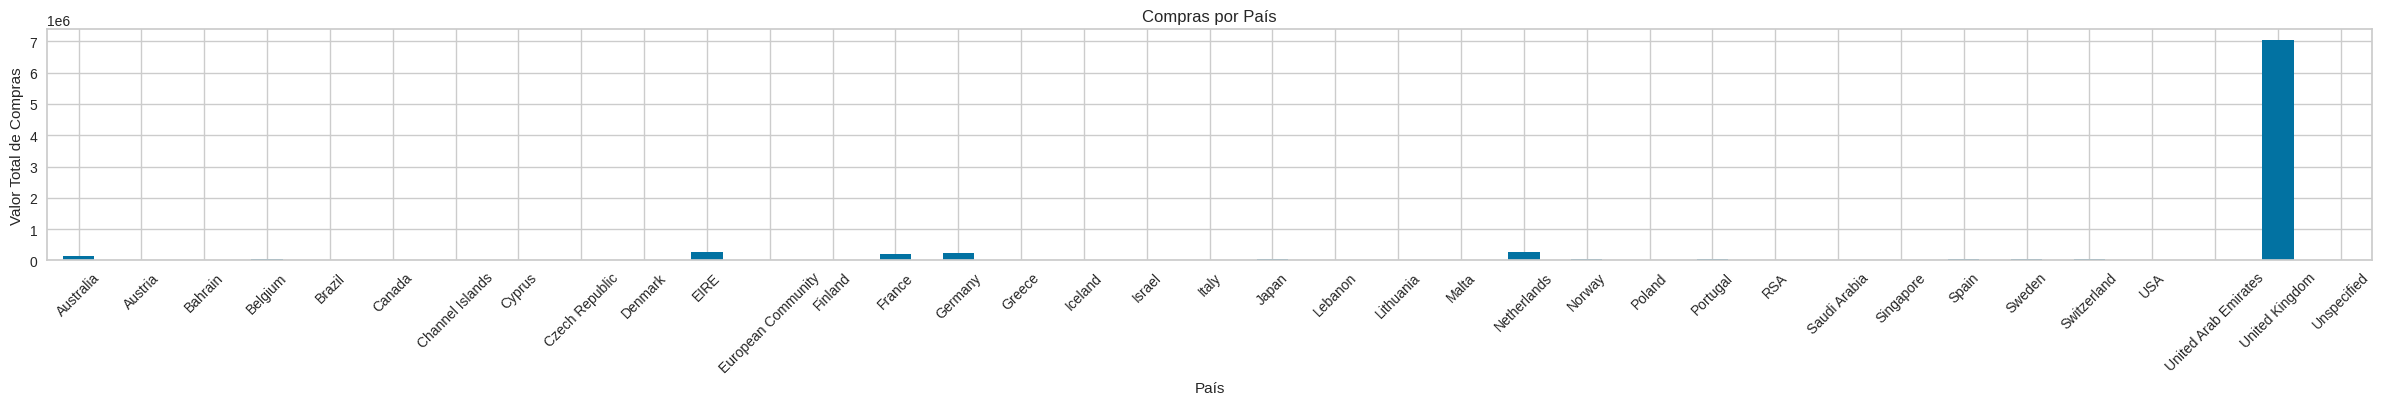

Country
Australia                138453.810
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20440.540
Cyprus                    13502.850
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265262.460
European Community         1300.250
Finland                   22546.080
France                   208934.310
Germany                  228678.400
Greece                     4760.520
Iceland                    4310.000
Israel                     7215.840
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33375.840
RSA                        1002.310
Saudi Arabia                145.920
Singapore                 21279.290
Spain                     61558.560
Sweden                    38367.830
Switzerland               56443.950
USA                        3580.390
United Arab Emirates       1902.280
United Kingdom          7031228.694
Unspecified                2660.770
Name: Total, dtype: float64

In [342]:
# Exemplo de dados de localização
compras_por_pais = df.groupby('Country')['Total'].sum()

compras_por_pais.plot(kind='bar', figsize=(30, 3))
plt.title('Compras por País')
plt.xlabel('País')
plt.ylabel('Valor Total de Compras')
plt.xticks(rotation=45)
plt.show()
compras_por_pais

In [343]:
# Seleção das variáveis mais relevantes para o modelo
df_cluster = df[['Quantity', 'UnitPrice', 'Total']]

In [344]:
scaler = PowerTransformer()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), index=df_cluster.index, columns=df_cluster.columns)
df_cluster_scaled

Quantity  UnitPrice     Total
0       0.175378   0.344659  0.373279
1       0.175378   0.681221  0.628012
2       0.430279   0.435051  0.697460
3       0.175378   0.681221  0.628012
4       0.175378   0.681221  0.628012
...          ...        ...       ...
392684  0.768511  -0.949555  0.005178
392685  0.175378   0.109898  0.197601
392686 -0.199281   0.911190  0.446629
392687 -0.199281   0.911190  0.446629
392688 -0.470713   1.103563  0.346357

[392689 rows x 3 columns]

<Axes: >

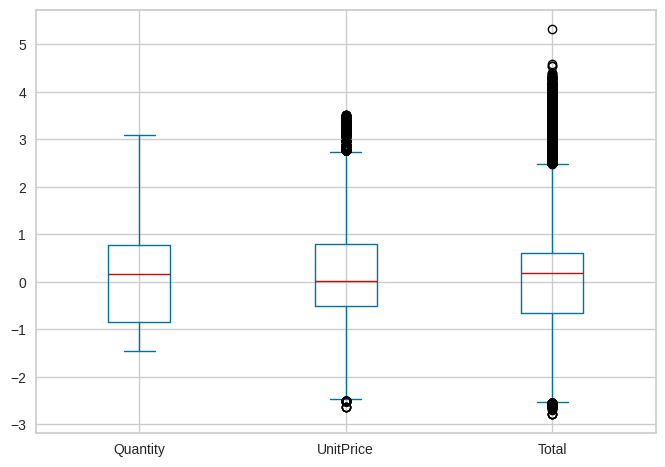

In [345]:
df_cluster_scaled.plot.box()

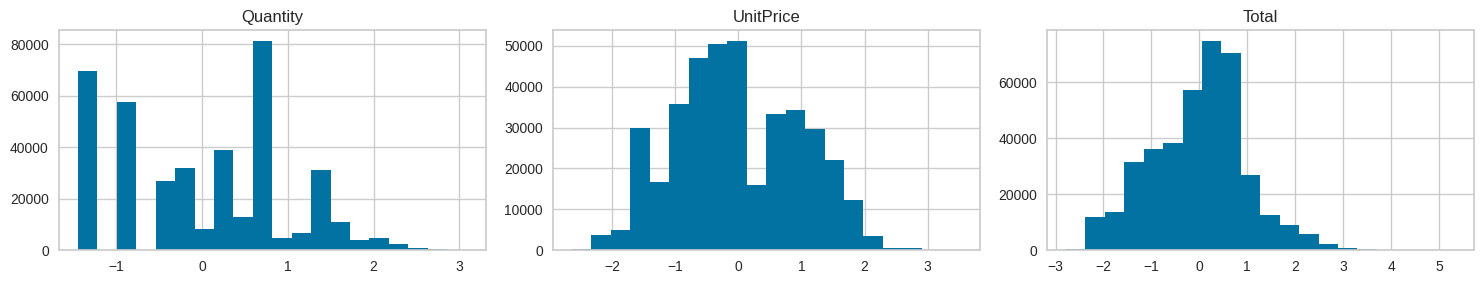

In [346]:
#KDE (Kernel Density Estimation)
df_cluster_scaled.hist(bins=20, figsize=(15, 3), layout=(1, 3))
plt.tight_layout()
plt.show()

In [347]:
df_cluster.describe()

Quantity      UnitPrice          Total
count  392689.000000  392689.000000  392689.000000
mean       12.724550       3.105194      21.985370
std        43.083696      18.055047      95.899104
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max      4800.000000    4161.060000   38970.000000

In [348]:
df_cluster_clip = df_cluster.apply(lambda x: x.clip(upper=x.quantile(.90)))
df_cluster_clip.describe()

Quantity      UnitPrice          Total
count  392689.000000  392689.000000  392689.000000
mean        8.184204       2.494699      13.877651
std         7.654464       1.870354      10.600770
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max        24.000000       6.350000      35.400000

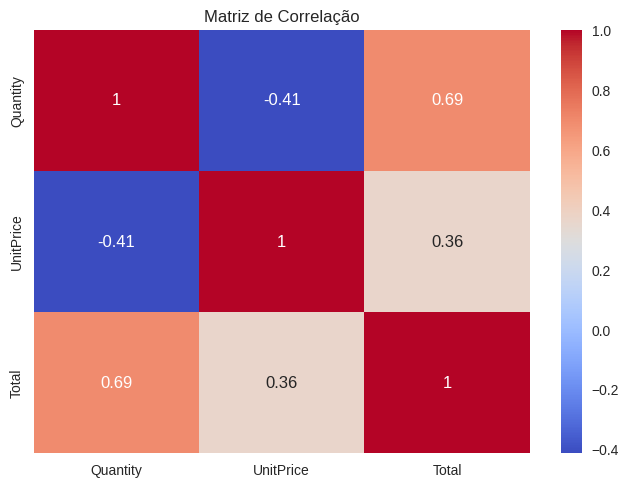

In [349]:
#HeatMap
sns.heatmap(df_cluster_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [350]:
df_cluster_clip_scaled = df_cluster_clip.apply(scale)

##Etapa 03 - Selecione um algoritmo de clusterização

1. Escolha um algoritmo adequado para base de dados, como o K0Means, DBSCAN, Hierarquia ou Mean Shift
2. Encontre a quantidade ideal de clusters através dos métodos de Elbow ou Silhouette Score
3. Implemente o algoritmo escolhido



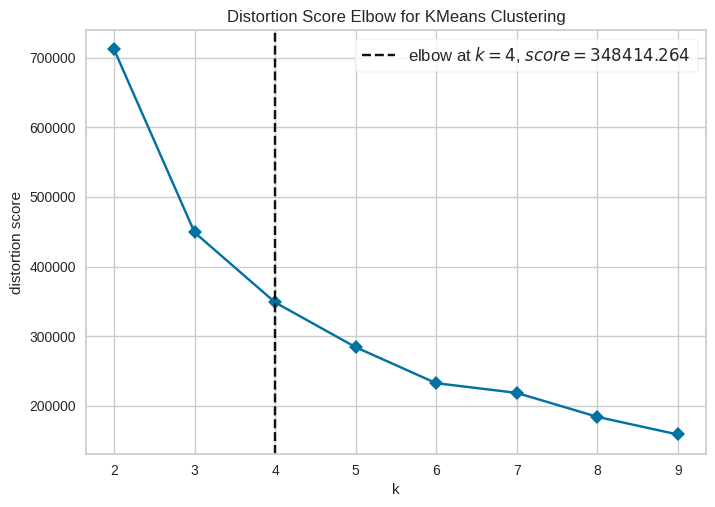

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [351]:
# KElbowVisualizer para encontrar o número ideal de clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(df_cluster_scaled)
visualizer.show()

In [352]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_cluster_scaled)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

<ipython-input-352-ee03a23c4851>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [353]:
df_cluster.head(5)

Quantity  UnitPrice  Total  Cluster
0         6       2.55  15.30        1
1         6       3.39  20.34        1
2         8       2.75  22.00        1
3         6       3.39  20.34        1
4         6       3.39  20.34        1

## Etapa 04 - Analise os clusters obtidos

1. Identifique os padrões e características em comum entre os clientes
2. Plote gráficos para auxiliar na análise



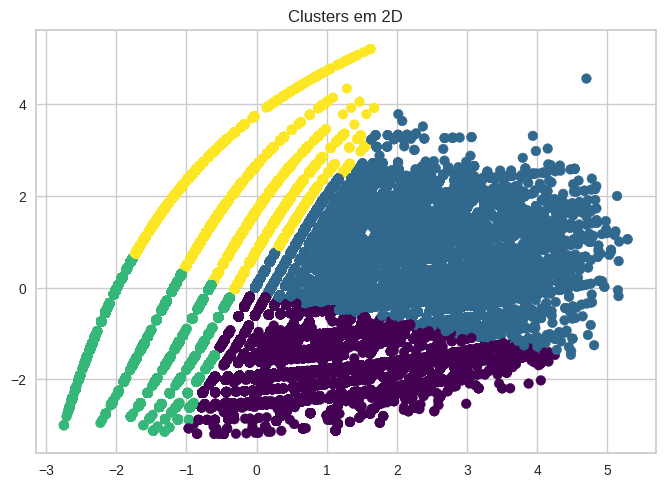

In [354]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_cluster_scaled)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cluster['Cluster'], cmap='viridis')
plt.title('Clusters em 2D')
plt.show()

In [355]:
fig = px.scatter_3d(df_cluster_clip, x='Quantity', y='UnitPrice', z='Total', color=kmeans_labels, template='plotly_dark')

# Show the plot
fig.show()

In [356]:
#Estatísticas Descritivas por Cluster
cluster_summary = df_cluster.groupby('Cluster').mean()
print(cluster_summary)

          Quantity  UnitPrice      Total
Cluster                                 
0        20.805336   0.793647  12.302675
1        23.763578   2.650315  50.753091
2         1.922822   1.483254   2.623443
3         2.380350   7.379938  15.109087


In [357]:
(
    df_cluster_clip.assign(cluster=kmeans_labels)
    .groupby('cluster')
    .mean()
    .transpose()
    .style.background_gradient(cmap='YlOrRd', axis=1)
)

In [358]:
#Comportamento por País
df['Cluster'] = df_cluster['Cluster']
cluster_country = df.groupby(['Country', 'Cluster']).size().unstack(fill_value=0)
print(cluster_country)

Cluster                   0      1      2      3
Country                                         
Australia               197    811     43    130
Austria                 121    189      0     88
Bahrain                   1     12      0      4
Belgium                 622    866      1    542
Brazil                    2     20      0     10
Canada                   57     63      0     31
Channel Islands         174    345      0    228
Cyprus                  111    197     80    215
Czech Republic           12     12      0      1
Denmark                 103    240      0     37
EIRE                   2040   3288     88   1810
European Community       13     29      0     18
Finland                 210    322      0    153
France                 2471   3883    312   1660
Germany                2814   4235    158   1818
Greece                   43     68      0     34
Iceland                  61     83      0     38
Israel                   79    102     15     49
Italy               

In [359]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_cluster_clip.columns)

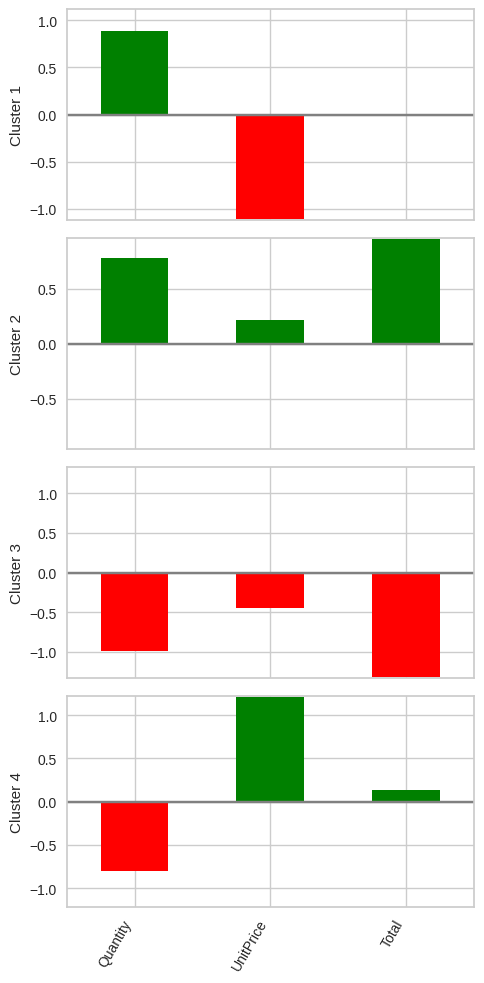

In [360]:
# Adaptando "Practical Statistics for Data Scientists"
fig, axes = plt.subplots(nrows=4, figsize=(5,10), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

## Etapa 05 - Interpretação dos resultados obtidos

#Perfis de compras dos clientes por cluster:
##Cluster 0: Baixo Volume e Baixo Valor
1. Compras: Poucas unidades e baixo gasto por item (0,79 por unidade).
2. Perfil: Compram pouco, com baixo valor total por cliente (11,58). Freqüência de compra baixa, com foco em itens baratos.
3. Locais: Reino Unido, França, Alemanha, EIRE

##Cluster 1: Alta Frequência e Alto Valor
1. Compras: Compram com frequência, gastando mais por item (2,53 por unidade).
2. Perfil: Este grupo gera mais receita (24,91 por cliente). São os melhores clientes da empresa.
3. Locais: Reino Unido, França, Bélgica.

##Cluster 2: Baixa Frequência e Baixo Valor
1. Compras: Compram pouco e gastam pouco por transação (1,48 por unidade).
2. Perfil: Poucas compras, com baixo valor total por cliente (2,62).
3. Locais: EIRE, França, Reino Unido.

##Cluster 3: Compras Moderadas e Alto Valor por Item
1. Compras: Compram menos unidades, mas gastam mais por item (7,38 por unidade).
2. Perfil: Alto gasto por produto, com valor total intermediário (13,64).
3. Locais: Reino Unido, França, Alemanha, EIRE.

___________________________________________________________
#Justifique como essa análise pode ser útil para empresa para segmentação de seus clientes e personalização das campanhas de marketing:
Essa análise é útil porque mostra como os clientes se comportam e ajuda a empresa a criar estratégias específicas para cada grupo. Conhecer os grupos com maior potencial de compra permite que a empresa foque em fidelizar esses clientes e aumentar o valor total que eles geram.

##Segmentação:
 A empresa pode dividir seus clientes com base no comportamento de compra. Por exemplo, quem compra muito, quem compra pouco, quem compra mais barato ou quem gasta mais em produtos caros. Isso facilita a criação de campanhas direcionadas.

##Personalização:
 Compreender as preferências de cada grupo permite criar ofertas específicas. Por exemplo, quem compra pouco pode ser atraído por descontos, enquanto quem gasta mais pode receber ofertas exclusivas ou produtos de alto valor.

##Eficiência:
  A empresa economiza ao focar em grupos específicos, em vez de gastar com campanhas genéricas. Isso aumenta o retorno sobre investimento (ROI).

##Sazonalidade:
  Saber quem são os clientes mais frequentes ou os de maior gasto pode ajudar a criar promoções eficazes durante períodos de alta demanda, como o Natal.

No final, isso melhora a experiência dos clientes e aumenta as vendas.

_____________________________________________________
#Sugira ações possíveis com base nas ações realizadas:

##Cluster 0: Clientes que Compram Pouco
1. Enviar cupons de desconto para futuras compras.
2. Oferecer promoções em produtos baratos.
3. Enviar e-mails com sugestões de produtos acessíveis.

##Cluster 1: Clientes que Compram Muito
1. Criar um programa de fidelidade com recompensas progressivas.
2. Oferecer promoções exclusivas e acesso antecipado a novos produtos.
3. Enviar agradecimentos personalizados e ofertas especiais para fidelizar.

##Cluster 2: Clientes Moderados
1. Oferecer descontos ou frete grátis para reativação.
2. Criar campanhas de upsell (produtos complementares).
3. Usar remarketing com cupons para incentivar compras.

##Cluster 3: Clientes Premium
1. Oferecer promoções em produtos premium (descontos ou pacotes).
2. Focar em upgrades para versões mais caras.
3. Enviar ofertas personalizadas baseadas no histórico de compras e navegação.